Jadi latar belakang permasalahanya adalah DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. 
DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan. Jadi ada cukup banyak pelanggan yang hjijrah ke kompetitornya.
Pihak manajemen tu pengen ngurangi jumlah pelanggan yang beralih atau biasa kita sebut *churn* dg menggunakan ml.
Makanya tim ds disuruh utk mpersiapkan data lalu buat model prediksi utk nentuin pelanggan itu bakalan churn/ga

kita disuruh nyiapin data buat sblm melakukan modeling
Langkah yang akan dilakukan adalah,

- Mencari ID pelanggan (Nomor telepon) yang valid
- Mengatasi data-data yang masih kosong (Missing Values)
- Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
- Menstandardisasi Nilai dari Variable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

 detail datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

In [4]:
# importing data

pd.options.display.max_columns = 50
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
print(f'data memiliki ukuran sejumlah {df.shape[0]} baris dan {df.shape[0]} kolom')

data memiliki ukuran sejumlah 7113 baris dan 7113 kolom


In [5]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# FILTER DATA DUPLIKASI

In [6]:
df.customerID.nunique() # mencari data customer ID yang bersifat unique

7017

In [10]:
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')

In [11]:
df = (df[df['valid_id'] == True]).drop('valid_id', axis = 1)

In [12]:
df['customerID'].count() # setelah difilter

7006

In [14]:
'''
biasa itu ada 2 tipe yaitu 
- Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
- Duplikasi dikarenakan inserting beda periode pengambilan data
'''


df.drop_duplicates()
# Drop duplicate ID sorted by Periode
df = df.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID') #sort value buat ngecek pengambilan dt terakhir
df['customerID'].count() # hasil jumlah customer ID setelah dihilangkan dupliksi(distinct)

6993

# FILTER DATA MISSING VALUE

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn-nya atau tidak.

Gunakan isnull() digunakan untuk mendeteksi missing values dan dropna() untuk menghapus data yang missing values.

In [15]:
print('Total missing values data dari kolom Churn',df['Churn'].isnull().sum())

# Dropping all Rows with spesific column (churn)
df.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

- Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
- Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

In [16]:
print('Status Missing Values :',df.isnull().values.any())

print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df[col_name].median()
    df[col_name].fillna(median, inplace=True)
    
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneServic

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)

# FILTER DATA YANG OUTLIER

Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman).

Melalui fungsi describe() ini kita hanya memperoleh statistik deskriptif ketiga kolom ini. Agar outlier pada ketiga kolom ini dapat dideteksi maka kamu diminta untuk memvisualisasikannya menggunakan boxplot-nya. Setiap satu boxplot ada di satu canvas figure. 

In [18]:
# summary statistiknya

df.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.0,6950.000000,6950.000000,6950.000000,6950.000000
mean,202006.0,0.162302,32.477266,65.783741,2305.083460
std,0.0,0.368754,25.188910,50.457871,2578.651143
min,202006.0,0.000000,0.000000,0.000000,19.000000
25%,202006.0,0.000000,9.000000,36.462500,406.975000
50%,202006.0,0.000000,29.000000,70.450000,1400.850000
75%,202006.0,0.000000,55.000000,89.850000,3799.837500
max,202006.0,1.000000,500.000000,2311.000000,80000.000000


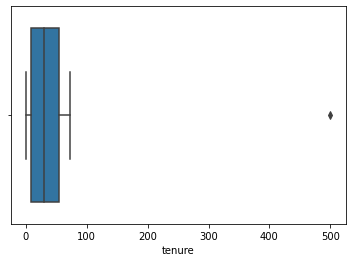

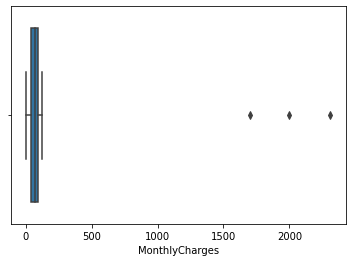

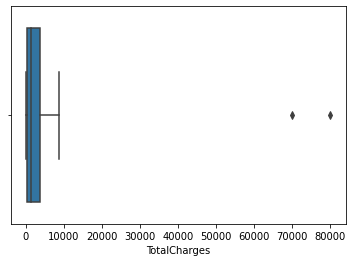

In [17]:
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['TotalCharges'])
plt.show()

## mengatasi nilai outlier

In [21]:
# Handling with IQR
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)


df       = df.mask(df > maximum, maximum, axis=1) 
df       = df.mask(df < minimum, minimum, axis=1)



Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_11228\4248605539.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df       = df.mask(df > maximum, maximum, axis=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_11228\4248605539.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df       = df.mask(df < minimum, minimum, axis=1)


In [20]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

# MENDETEKSI NILAI YG TIDAK STANDAR

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya.

In [23]:
# Masukkan variable
for col_name in list(['gender','SeniorCitizen','Partner',
'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi replace() untuk menstandardkan nilai.

In [24]:
df = df.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

- Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
- Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
- Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.